# Differencing Determination

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.columns = df.columns.str.strip() #strip spaces in names

             Bitcoin   Tether  Litecoin       XRP  Ethereum  Dogecoin  \
Month                                                                   
2017-09-01 -1.398923 -3.82830  -1.02849 -0.898590 -1.320943 -1.405018   
2017-10-01 -1.339539 -3.73861  -0.77151 -1.145490 -0.837982 -0.464897   
2017-11-01 -1.622995 -4.01951  -1.44830 -1.192080 -1.837874 -1.371050   
2017-12-01 -1.267670 -2.55687  -1.11575 -1.254630 -1.310402 -0.702095   
2018-01-01 -0.892511 -2.75193  -0.24164  0.038975 -0.811280 -0.334438   

            Cardano  USD Coin    VIX   MOVE  LFPR      CPI     r      M1  \
Month                                                                      
2017-09-01      NaN       NaN  10.59  52.88  63.1  246.819  1.15  3535.6   
2017-10-01      NaN       NaN   9.51  51.15  62.7  246.663  1.15  3615.0   
2017-11-01      NaN       NaN  10.18  46.83  62.7  246.669  1.16  3587.6   
2017-12-01      NaN       NaN  11.28  46.60  62.7  246.524  1.30  3630.5   
2018-01-01      NaN       NaN  1

In [3]:
from statsmodels.tsa.stattools import adfuller

for col in df.columns:
    result = adfuller(df[col].dropna())
    print(f'{col}: p-value = {result[1]}')

Bitcoin: p-value = 1.0920519383748658e-07
Tether: p-value = 0.8239483673421706
Litecoin: p-value = 6.988828950914855e-08
XRP: p-value = 0.15677767022854167
Ethereum: p-value = 0.19481860779486204
Dogecoin: p-value = 0.00021364853735330477
Cardano: p-value = 0.36553877495692955
USD Coin: p-value = 0.010444507366033444
VIX: p-value = 0.0005140917362464705
MOVE: p-value = 0.39943677654417753
LFPR: p-value = 0.08227483714715461
CPI: p-value = 0.9044645691224062
r: p-value = 0.2221536107412167
M1: p-value = 0.6682267419637112
GDP: p-value = 0.6825705492402224
IM: p-value = 0.9431792986923209
EX: p-value = 0.8691521189557727
CC: p-value = 0.6282641357619623
CC Monthly % Change: p-value = 2.125797825164221e-07
Bitcoin Price: p-value = 0.9720747605868902


p>0.05, Tether, XRP, Ethereum, Cardano, MOVE, LFPR, CPI, r, M1, GDP, IM, EX, CC need to be diffed

In [4]:
def check_stationarity(series):
    result = adfuller(series.dropna())
    p_value = result[1]
    print(f"ADF test for {series.name}: p-value = {p_value:.4f}")

list=['Tether', 'XRP', 'Ethereum', 'Cardano', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC','Bitcoin Price']
for l in list:
    check_stationarity(df[l].diff())  # Expect p < 0.05

ADF test for Tether: p-value = 0.0000
ADF test for XRP: p-value = 0.0000
ADF test for Ethereum: p-value = 0.0000
ADF test for Cardano: p-value = 0.0000
ADF test for MOVE: p-value = 0.0000
ADF test for LFPR: p-value = 0.0000
ADF test for CPI: p-value = 0.5877
ADF test for r: p-value = 0.1568
ADF test for M1: p-value = 0.0000
ADF test for GDP: p-value = 0.0000
ADF test for IM: p-value = 0.0000
ADF test for EX: p-value = 0.0000
ADF test for CC: p-value = 0.0000
ADF test for Bitcoin Price: p-value = 0.0000


In [5]:
list=['CPI', 'r']
for l in list:
    check_stationarity((df[l].diff()).diff())

ADF test for CPI: p-value = 0.0000
ADF test for r: p-value = 0.0000


Stationarity order results:
Bitcoin: 0
Tether: 1
Litecoin: 0
XRP: 1
Ethereum: 1
Dogecoin: 0
Cardano: 1
USD Coin: 0
VIX: 0
MOVE: 1
LFPR: 1
CPI: 2
r: 2
M1: 1
GDP: 1
IM: 1
EX: 1
CC: 1
CC Monthly % Change: 0
Bitcoin price: 1

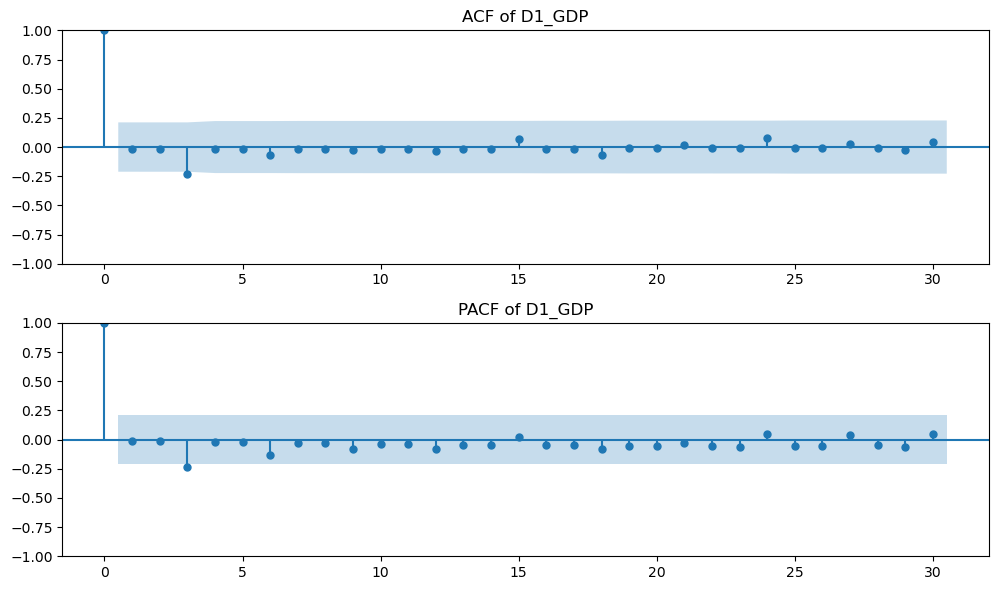

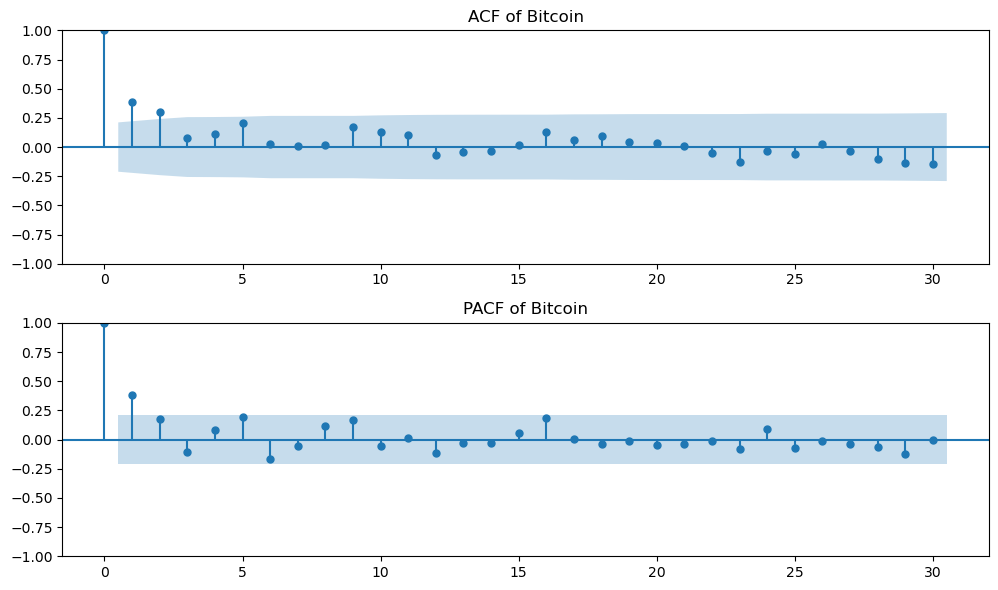

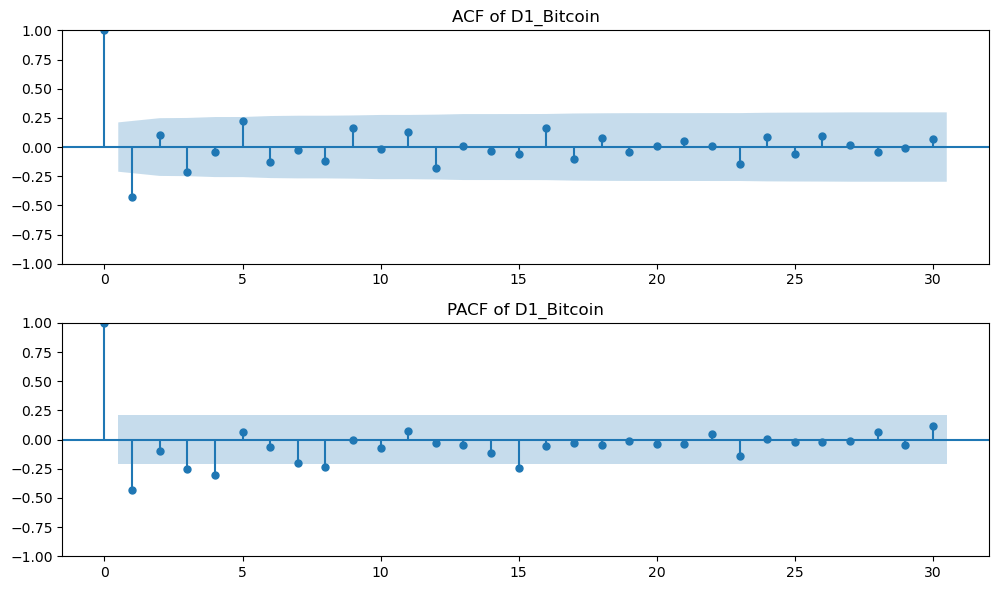

In [9]:
df['D1_Ethereum']=df['Ethereum'].diff()
df['D1_XRP']=df['XRP'].diff()
df['D1_Cardano']=df['Cardano'].diff()
df['D1_M1']=df['M1'].diff()
df['D1_LFPR']=df['LFPR'].diff()
df['D1_GDP']=df['GDP'].diff()
df['D1_EX']=df['EX'].diff()
df['D1_IM']=df['IM'].diff()

df['D1_Bitcoin']=df['Bitcoin'].diff()

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Make sure no NaNs
df = df.dropna(subset=['D1_GDP', 'Bitcoin'])

# ACF and PACF for D1_GDP
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['D1_GDP'], lags=30, ax=ax[0])
ax[0].set_title('ACF of D1_GDP')
plot_pacf(df['D1_GDP'], lags=30, ax=ax[1])
ax[1].set_title('PACF of D1_GDP')
plt.tight_layout()
plt.show()

# ACF and PACF for Bitcoin
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['Bitcoin'], lags=30, ax=ax[0])
ax[0].set_title('ACF of Bitcoin')
plot_pacf(df['Bitcoin'], lags=30, ax=ax[1])
ax[1].set_title('PACF of Bitcoin')
plt.tight_layout()
plt.show()

# ACF and PACF for D1_Bitcoin
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['D1_Bitcoin'], lags=30, ax=ax[0])
ax[0].set_title('ACF of D1_Bitcoin')
plot_pacf(df['D1_Bitcoin'], lags=30, ax=ax[1])
ax[1].set_title('PACF of D1_Bitcoin')
plt.tight_layout()
plt.show()


/Users/tianyishen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tianyishen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tianyishen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tianyishen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tianyishen/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

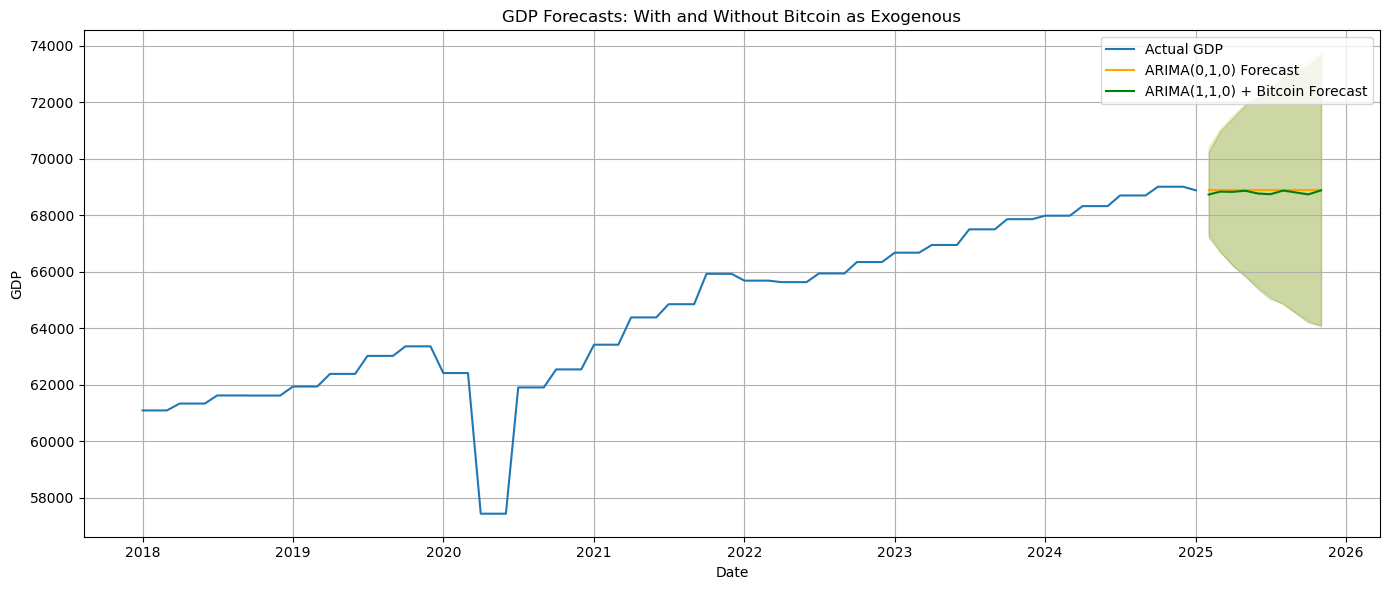

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# --- 1. Prepare data ---
df['D1_GDP'] = df['GDP'].diff()
df['D1_Bitcoin'] = df['Bitcoin'].diff()
df_clean = df.dropna(subset=['D1_GDP', 'D1_Bitcoin'])

# --- 2. Fit ARIMA(0,1,0) GDP only ---
model_gdp = ARIMA(df_clean['GDP'], order=(0,1,0))
results_gdp = model_gdp.fit()

# --- 3. Fit ARIMA(1,1,0) GDP with Bitcoin as exog ---
model_gdp_exog = ARIMA(df_clean['GDP'], order=(1,1,0), exog=df_clean[['D1_Bitcoin']])
results_gdp_exog = model_gdp_exog.fit()

# --- 4. Forecast ahead (same horizon) ---
n_forecast = 10

forecast_gdp = results_gdp.get_forecast(steps=n_forecast)
forecast_gdp_exog = results_gdp_exog.get_forecast(steps=n_forecast, exog=df_clean[['D1_Bitcoin']].iloc[-n_forecast:])

# --- 5. Plotting ---
plt.figure(figsize=(14,6))
plt.plot(df_clean.index, df_clean['GDP'], label='Actual GDP')

# GDP-only forecast
plt.plot(forecast_gdp.predicted_mean.index, forecast_gdp.predicted_mean, label='ARIMA(0,1,0) Forecast', color='orange')
plt.fill_between(forecast_gdp_ci := forecast_gdp.conf_int().index,
                 forecast_gdp.conf_int().iloc[:, 0],
                 forecast_gdp.conf_int().iloc[:, 1], color='orange', alpha=0.2)

# With Bitcoin
plt.plot(forecast_gdp_exog.predicted_mean.index, forecast_gdp_exog.predicted_mean, label='ARIMA(1,1,0) + Bitcoin Forecast', color='green')
plt.fill_between(forecast_gdp_exog_ci := forecast_gdp_exog.conf_int().index,
                 forecast_gdp_exog.conf_int().iloc[:, 0],
                 forecast_gdp_exog.conf_int().iloc[:, 1], color='green', alpha=0.2)

plt.title('GDP Forecasts: With and Without Bitcoin as Exogenous')
plt.legend()
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.tight_layout()
plt.show()
